<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/titanic_basic_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 로드 & 기본환경설정

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [ ]:
#시각화를 위한 테마 설정
plt.style.use('ggplot')
#그래프를 선명하게
set_matplotlib_formats('svg')

#데이터 가져오기 & 미리보기


In [ ]:
#훈련 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/train.csv')

In [ ]:
#훈련 데이터 미리보기
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#훈련 데이터의 정보 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#훈련 데이터 수치적 요약
train.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#훈련 데이터 범주적 요약
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Icard, Miss. Amelie",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
#테스트 데이터 로드
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/test.csv')

In [ ]:
#테스트 데이터 미리보기
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#테스트 데이터 정보 요약
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#테스트 데이터 수치적 요약
test.describe(include=np.number)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#테스트 데이터의 범주적 요약
test.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Danbom, Master. Gilbert Sigvard Emanuel",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


#EDA

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


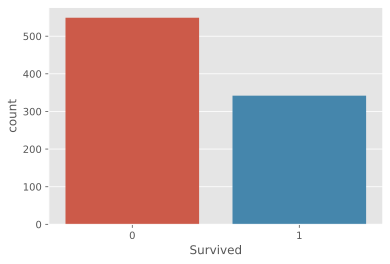

In [ ]:
#countplot으로 Survivie를 표현
sns.countplot(data=train, x='Survived')

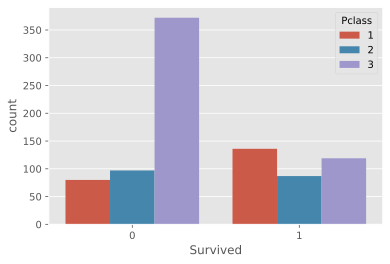

In [ ]:
#Pclass에 따라 Survived를 표현
sns.countplot(data=train, x='Survived', hue='Pclass')

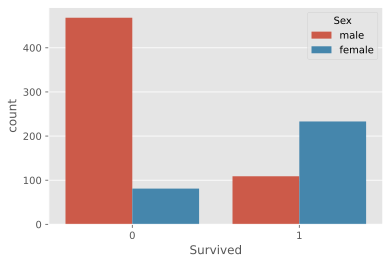

In [ ]:
#Survived를 Sex에 따라 표현
sns.countplot(data=train, x='Survived', hue='Sex')

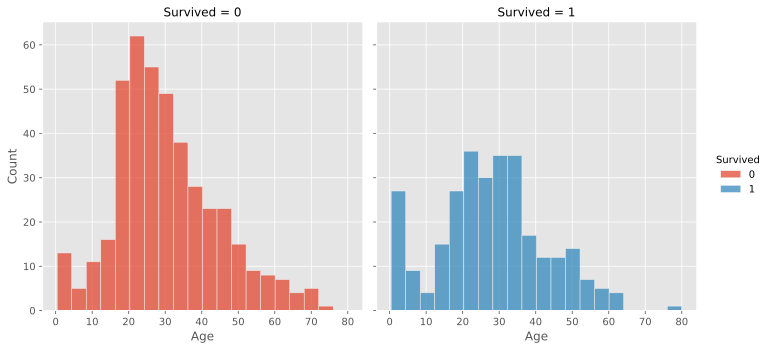

In [ ]:
#Age에 따라 Survived를 표현
sns.displot(kind='hist', data=train, x='Age', hue='Survived', col='Survived')

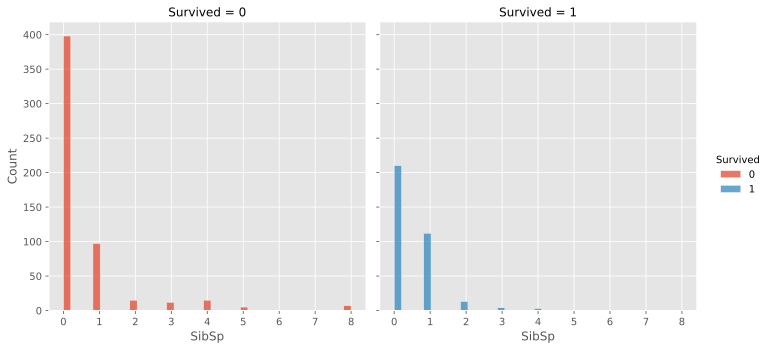

In [ ]:
#SibSp에 따라 Survived 확인
sns.displot(data=train, kind='hist', x='SibSp', hue='Survived', col = 'Survived')

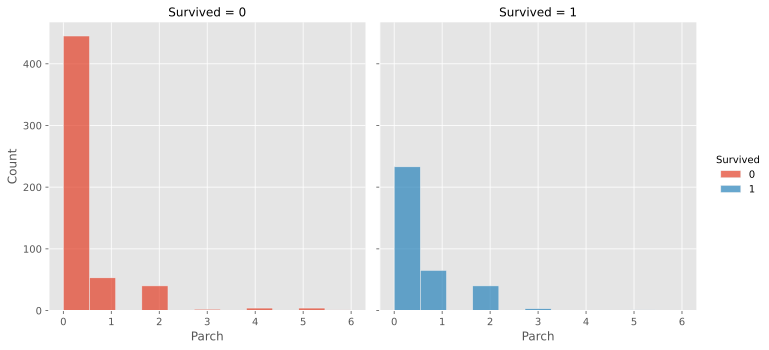

In [ ]:
#Parch에 따라 Survived 확인
sns.displot(data=train, kind='hist', x='Parch', hue='Survived', col="Survived")

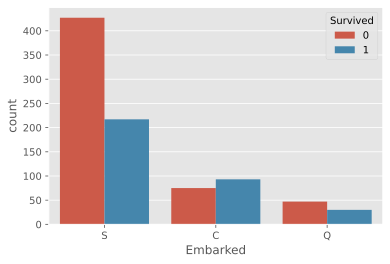

In [ ]:
#Embarked에 따라 Survived 표현
sns.countplot(data=train, x='Embarked', hue='Survived')

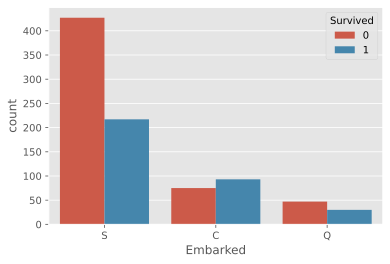

##데이터 전처리

In [ ]:
#결측치 다루기, train 0 ~ 890, test : 890 ~ 
train_survived = train['Survived']
train = train.drop('Survived', axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
#데이터 합치기
df = pd.concat([train, test], ignore_index=True,)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [ ]:
#Age 값을 채우기
#Age의 평균값인 29로 채움
df['Age'] = df['Age'].fillna(29)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
#Cabin의 결측치가 너무 많기 때문에 제거
#PassengerId값 또한 제거

df_passengerId = df['PassengerId']
df = df.drop('PassengerId', axis=1)
df = df.drop('Cabin', axis=1)

In [ ]:
#Name 값 또한 제거
df = df.drop('Name', axis=1)

In [ ]:
#Tiket 제거
df = df.drop('Ticket' , axis=1)

In [ ]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
#Embaked의 null값을 S로 채움
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
df['Embarked'].isnull().sum()

0

In [ ]:
#Fare의 null값을 평균값으로 채움
#평균값은 33
print(df['Fare'].isnull().sum())
df['Fare'] = df['Fare'].fillna(33)
print(df['Fare'].isnull().sum())

1
0


In [ ]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
#One-hot-encoding으로 Sex, Embarked 설정
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

#머신러닝

##훈련, 예측 데이터 준비

In [ ]:
X_train = df[:891]
y_train = train_survived
X_test = df[891:]

In [ ]:
X_train.shape

(891, 10)

In [ ]:
y_train.shape

(891,)

In [ ]:
X_test.shape

(418, 10)

##훈련 및 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model = DecisionTreeClassifier(random_state=42)
model
DecisionTreeClassifier?

array([7, 5, 7, 4, 9, 6, 9, 4, 8, 7])

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
max_depth = np.arange(1,10,1)
max_features = np.arange(0.1, 1.0, 0.1)
max_leaf_nodes = np.arange(1,10,1)

param_grid = {"max_depth" : max_depth,
              "max_features" : max_features,
              "max_leaf_nodes" : max_leaf_nodes
              }
              
grid = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1,cv=5)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
        

In [ ]:
grid.best_params_

{'max_depth': 5, 'max_features': 0.6, 'max_leaf_nodes': 7}

In [ ]:
grid.best_score_

0.8192894356914191

In [ ]:
best_estimator = grid.best_estimator_

In [ ]:
y_pred = best_estimator.predict(X_test)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submit['Survived'] = y_pred

In [ ]:
(submit['Survived'] != y_pred).sum()

0

In [ ]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submit.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/second_titanic_submit.csv", index=False)

In [ ]:
first_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/second_titanic_submit.csv')
first_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
